# Windowed plotting (location, mag and origin time)

Script to plot locations and magnitudes of events in a time window of the catalogue, plotted symbols are coloured by time (in years after the start of the window)

Makes figures like 9a-b of Shaw et al., 2021



Import required modules and specify plotting font/font sizes

In [1]:
import os
import pandas as pd

import geopandas as gpd
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np

from rsqsim_api.fault.multifault import RsqSimMultiFault
from rsqsim_api.catalogue.catalogue import RsqSimCatalogue
from rsqsim_api.visualisation.utilities import plot_coast, format_label_text_wgs

# Plotting parameters

params = {'axes.labelsize': 12,
          'axes.titlesize': 12,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12,
          'font.family': 'serif',
          'font.serif': "CMU Serif",
          'font.size': 12,
          'xtick.direction': "in",
          'ytick.direction': 'in',
          'xtick.top': True,
          'ytick.right': True
          }
mpl.rcParams.update(params)


Specify data location and read in catalogue

Note that the `reproject` argument uses EPSG codes. As the data are read in, they are reprojected from UTM Zone 59S to WGS84 LonLat.

In [2]:
# Location of catalogue relative to current working directory
catalogue_file = "../../data/shaw2021/nzcatalogue.csv"

# Catalogue data are in seconds, but desirable to plot in years
seconds_per_year = 31557600.0


# Boundaries of plot
x1 = 160.
x2 = 185.
y1 = -51.
y2 = -33.001

# Read in catalogue (include reproject data to lonlat)
whole_catalogue = RsqSimCatalogue.from_catalogue_file(catalogue_file, reproject=[32759, 4326])

Create and save the plots

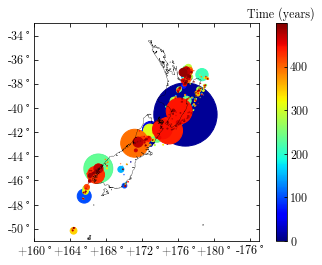

In [3]:
# Example of 500 year window
window_length = 500. * seconds_per_year

# If directory to save files does not exist, create it
if not os.path.exists("windows_time500"):
    os.mkdir("windows_time500")

# Make 10 plots to show variation in catalogue
for i in range(10):
    plt.close("all")
    # Start plots at 1.e12 seconds
    tmin = 1.e12 + i * window_length
    # End of window
    tmax = tmin + window_length
    
    # Extract catalogue for time window of interest
    windowed_df = whole_catalogue.filter_df(min_t0=tmin, max_t0=tmax)
    
    # Create figure object
    fig, ax = plt.subplots()
    cmap = ax.scatter(windowed_df.x, windowed_df.y, marker='o', 
                      s=windowed_df.area/1.e7,  # Size scaling is by rupture area
                      c=(windowed_df.t0 - tmin) / seconds_per_year, # Colour scaling by time (yrs after window start)
                      cmap="jet", vmin=0, vmax=window_length / seconds_per_year - 1.)
    
    # Plot coastline
    plot_coast(ax=ax, edgecolor="k", wgs=True, coarse=True)
    
    # Trim plot to area of interest
    ax.set_xlim(([x1, x2]))
    ax.set_ylim(([y1, y2]))
    
    # Make labelling prettier (and add degree symbols)
    format_label_text_wgs(ax, xspacing=4, yspacing=2)
    
    # Make colorbar
    colorbar = plt.colorbar(cmap, ax=ax)
    colorbar.ax.set_title("Time (years)")
    
    # Save plots
    plt.savefig(f"windows_time500/window{i}_1500year.png")
